In [0]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [0]:
arr = np.array([1, 2, 3, 4, 5, 126, 21, 33, 6, 73, 2, 3, 56, 98, 100, 4, 8, 33, 102])
arr2 = np.random.randint(low=1,high=500,size=(50,2))
arr3 = np.random.randint(low=400,high=900,size=(50,2))
arr4 = np.random.randint(low=800,high=1300,size=(50,2))
arr_agg = np.concatenate((arr2, arr3, arr4), 0)
arr_agg

array([[ 463,   24],
       [ 230,  265],
       [ 317,  156],
       [ 156,  102],
       [ 158,  337],
       [ 170,  209],
       [ 364,  474],
       [ 482,   30],
       [ 232,  470],
       [ 383,   47],
       [ 428,  457],
       [ 105,    4],
       [ 145,  142],
       [   3,   57],
       [ 408,  189],
       [ 133,   82],
       [ 284,    1],
       [ 245,  114],
       [ 353,  486],
       [  81,  300],
       [ 485,  122],
       [ 110,   26],
       [   1,   46],
       [ 413,  114],
       [ 319,   74],
       [  12,  461],
       [ 227,  488],
       [ 152,  427],
       [ 445,  200],
       [ 100,  223],
       [ 383,   11],
       [ 239,  206],
       [ 128,   69],
       [ 210,  222],
       [ 474,   19],
       [ 306,  104],
       [ 226,  408],
       [ 174,  463],
       [ 497,  361],
       [ 169,   15],
       [ 342,   74],
       [ 333,  147],
       [  70,   81],
       [ 101,  378],
       [   9,  340],
       [ 215,  238],
       [ 153,  354],
       [ 400,

In [0]:
def f(arr):
  t = tf.convert_to_tensor(arr, dtype=tf.float32)
  t = tf.expand_dims(t, 1)

  return (t, None)

def f2(arr):
  t = tf.convert_to_tensor(arr, dtype=tf.float32)
  return (t, None)

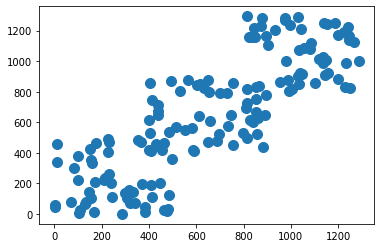

In [0]:
# plt.scatter(x=arr, y=np.zeros_like(arr), s=100)
plt.scatter(arr_agg[:,0], arr_agg[:,1], s=100)
plt.show()

In [0]:
k_means_estimator = tf.estimator.experimental.KMeans(num_clusters=3)
from tensorflow.contrib.factorization.python.ops import clustering_ops

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpshep208n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ffa4e5dc518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# fit = k_means_estimator.train(input_fn=lambda: f(arr), steps=1000)
fit2 = k_means_estimator.train(input_fn=lambda: f2(arr_agg), steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpshep208n/model.ckpt.
INFO:tensorflow:loss = 12270906.0, step = 1
INFO:tensorflow:global_step/sec: 949.696
INFO:tensorflow:loss = 6705336.5, step = 101 (0.108 sec)
INFO:tensorflow:global_step/sec: 749.868
INFO:tensorflow:loss = 6682505.5, step = 201 (0.131 sec)
INFO:tensorflow:global_step/sec: 1107.01
INFO:tensorflow:loss = 6658162.5, step = 301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1170.04
INFO:tensorflow:loss = 6642079.5, step = 401 (0.086 sec)
INFO:tensorflow:global_step/sec: 986.064
INFO:tensorflow:loss = 6633764.5, step = 501 (0.105 sec)
INFO:tensorflow:global_step/sec: 1123.79
INFO:tensorflow:loss = 6624838.0, step = 601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1097.27
INFO:tensorflow

In [0]:
clusters = k_means_estimator.cluster_centers()
clusters

array([[1059.8649 , 1071.3486 ],
       [ 655.3247 ,  651.8027 ],
       [ 249.72348,  205.88449]], dtype=float32)

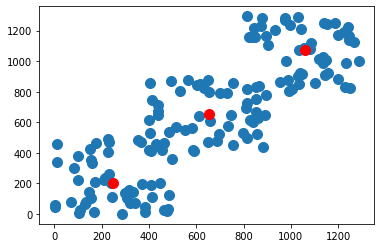

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(arr_agg[:,0], arr_agg[:,1], s=100, marker='o')
ax1.scatter(clusters[:,0], clusters[:,1], s=100, c='r', marker='o')


In [0]:
for name in fit.get_variable_names():
  print(name, " ------> ", fit.get_variable_value(name))

Variable  ------>  [14002  5000]
clusters  ------>  [[12.944519]
 [99.8107  ]]
global_step  ------>  1000
initialized  ------>  True


In [0]:
x = np.array([0, 100], dtype='float32')


# Transforms each data point specified to distance from clusters
transform = k_means_estimator.transform(input_fn=lambda: f(x))

In [0]:
predict = k_means_estimator.predict(input_fn=lambda: f(x))
predict2 = k_means_estimator.predict(input_fn=lambda: f2([[1000, 1000]]))

In [0]:
next(predict2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpshep208n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_distances': array([   8674.5 ,  240042.44, 1193534.2 ], dtype=float32),
 'cluster_index': 0}